In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
# Load the Dataset
data = pd.read_excel('/Users/ravindrababuponnapula/Downloads/US Insurance Claims Data.xlsx')

In [5]:
data.shape

(10000, 39)

In [7]:
# Understand the Dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           9000 non-null   float64       
 1   age                          9000 non-null   float64       
 2   policy_number                9000 non-null   float64       
 3   policy_bind_date             9000 non-null   datetime64[ns]
 4   policy_state                 9000 non-null   object        
 5   policy_csl                   9000 non-null   object        
 6   policy_deductable            9000 non-null   float64       
 7   policy_annual_premium        9000 non-null   float64       
 8   umbrella_limit               9000 non-null   float64       
 9   insured_zip                  9000 non-null   float64       
 10  insured_sex                  9000 non-null   object        
 11  insured_education_le

In [9]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       months_as_customer          age  policy_number  \
count         9000.000000  9000.000000   9.000000e+03   
mean           203.967444    38.952333   5.462581e+05   
min              0.000000    19.000000   9.850400e+04   
25%            115.000000    32.000000   3.360755e+05   
50%            200.000000    38.000000   5.326865e+05   
75%            277.000000    45.000000   7.616242e+05   
max            487.000000    65.000000   1.019466e+06   
std            115.128240     9.147934   2.569948e+05   

                    policy_bind_date  policy_deductable  \
count                           9000        9000.000000   
mean   2009-01-01 21:54:46.768676352        1135.719889   
min       1993-06-21 19:49:33.537000         484.000000   
25%    2001-03-28 08:52:10.152749952         503.000000   
50%    2009-01-01 21:54:46.768499968         999.000000   
75%    2016-10-08 10:57:23.384249856        1982.000000   
max              2024-07-15 00:00:00        2074.000

In [11]:
print("\nChecking for Missing Values:")
print(data.isnull().sum())


Checking for Missing Values:
months_as_customer             1000
age                            1000
policy_number                  1000
policy_bind_date               1000
policy_state                   1000
policy_csl                     1000
policy_deductable              1000
policy_annual_premium          1000
umbrella_limit                 1000
insured_zip                    1000
insured_sex                    1000
insured_education_level        1000
insured_occupation             1000
insured_hobbies                1000
insured_relationship           1000
capital-gains                  1000
capital-loss                   1000
incident_date                  1000
incident_type                  1000
collision_type                 1000
incident_severity              1000
authorities_contacted          1819
incident_state                 1000
incident_city                  1000
incident_location              1000
incident_hour_of_the_day       1000
number_of_vehicles_involved    100

In [13]:
# Handle missing values
data['police_report_available'].replace('?', np.nan, inplace=True)
data['police_report_available'].fillna(data['police_report_available'].mode()[0], inplace=True)

/var/folders/vz/4w4ss9z17jj01jv7hv7f_qbw0000gn/T/ipykernel_55754/33069734.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['police_report_available'].replace('?', np.nan, inplace=True)
/var/folders/vz/4w4ss9z17jj01jv7hv7f_qbw0000gn/T/ipykernel_55754/33069734.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [15]:
#Check for missing values
print(data.isna().sum())

months_as_customer             1000
age                            1000
policy_number                  1000
policy_bind_date               1000
policy_state                   1000
policy_csl                     1000
policy_deductable              1000
policy_annual_premium          1000
umbrella_limit                 1000
insured_zip                    1000
insured_sex                    1000
insured_education_level        1000
insured_occupation             1000
insured_hobbies                1000
insured_relationship           1000
capital-gains                  1000
capital-loss                   1000
incident_date                  1000
incident_type                  1000
collision_type                 1000
incident_severity              1000
authorities_contacted          1819
incident_state                 1000
incident_city                  1000
incident_location              1000
incident_hour_of_the_day       1000
number_of_vehicles_involved    1000
property_damage             

In [17]:
#Handle missing values in numerical columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())


In [19]:
#Handle missing values in categorical columns
categorical_features = data.select_dtypes(include=['object']).columns
for column in categorical_features:
    mode_value = data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)

In [21]:
#Convert all categorical columns to strings
data[categorical_features] = data[categorical_features].astype(str)

In [23]:
#Remove any remaining rows with NaN values
data = data.dropna()

In [25]:
#Reset the index after removing rows
data = data.reset_index(drop=True)

In [27]:
#Verify that all missing values have been handled

print(data.isna().sum())


months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [29]:
# Preprocessing
# Convert date column to datetime and extract useful features
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data['policy_bind_year'] = data['policy_bind_date'].dt.year
data['policy_bind_month'] = data['policy_bind_date'].dt.month

In [31]:
# Analyze numerical variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

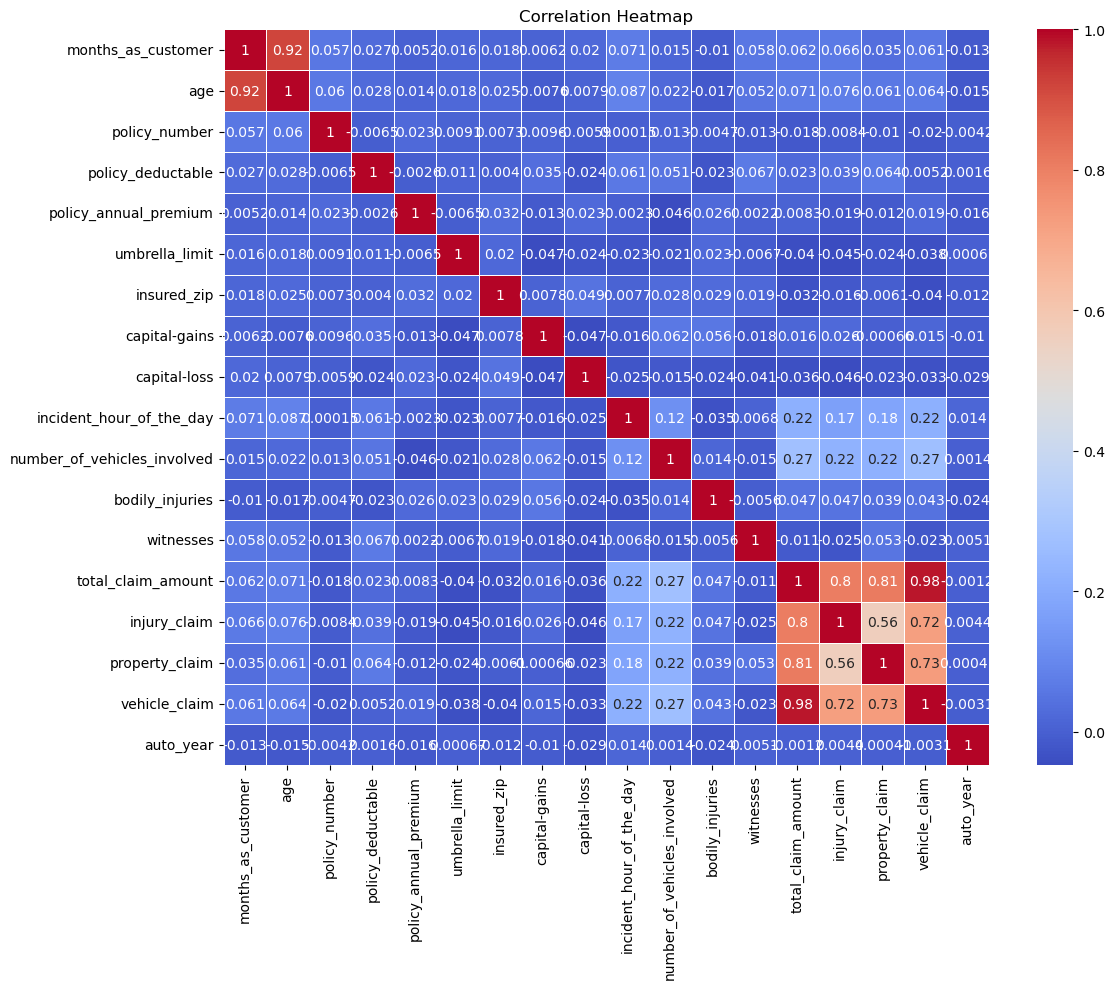

In [33]:
# Correlation analysis
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

/var/folders/vz/4w4ss9z17jj01jv7hv7f_qbw0000gn/T/ipykernel_55754/2995646829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='fraud_reported', y='total_claim_amount', palette={'Y': 'salmon', 'N': 'skyblue'})


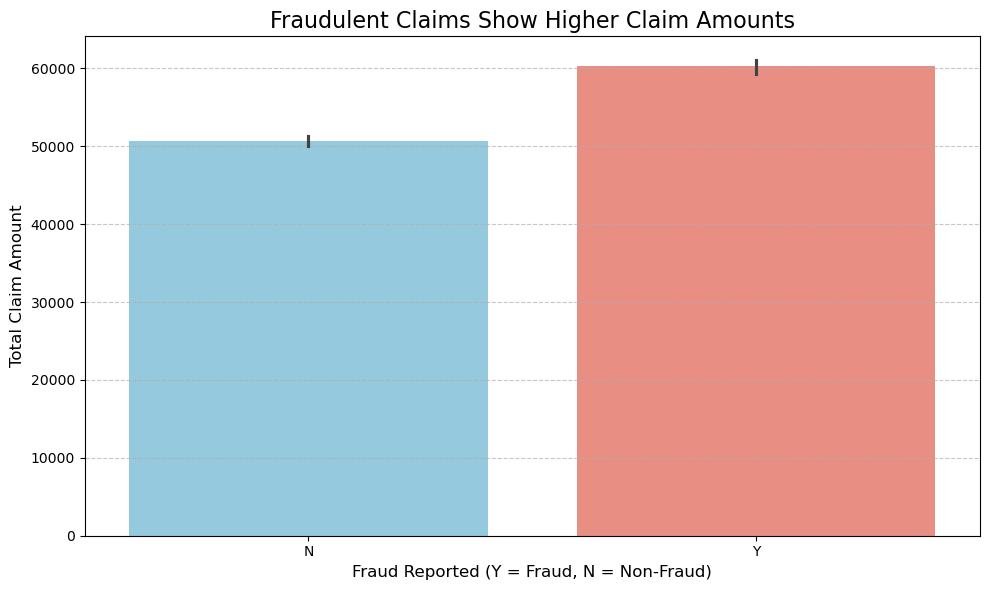

In [34]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.barplot(data=data, x='fraud_reported', y='total_claim_amount', palette={'Y': 'salmon', 'N': 'skyblue'})

# Customize the plot
plt.title('Fraudulent Claims Show Higher Claim Amounts', fontsize=16)
plt.xlabel('Fraud Reported (Y = Fraud, N = Non-Fraud)', fontsize=12)
plt.ylabel('Total Claim Amount', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


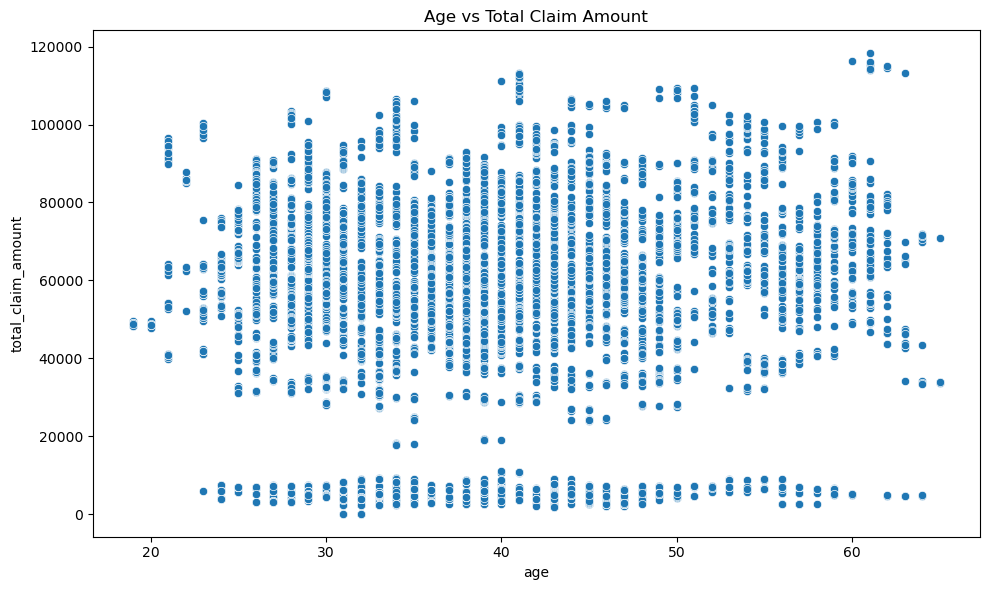

In [37]:
# Analyze relationship between age and total claim amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_claim_amount', data=data)
plt.title('Age vs Total Claim Amount')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

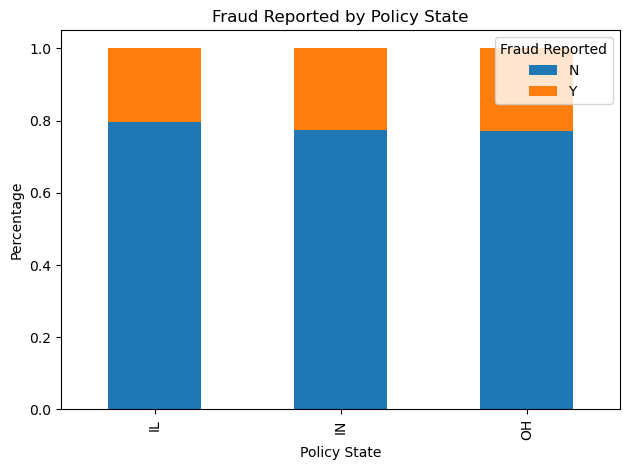

In [39]:
# Analyze fraud reported by policy state
plt.figure(figsize=(12, 6))
fraud_by_state = data.groupby('policy_state')['fraud_reported'].value_counts(normalize=True).unstack()
fraud_by_state.plot(kind='bar', stacked=True)
plt.title('Fraud Reported by Policy State')
plt.xlabel('Policy State')
plt.ylabel('Percentage')
plt.legend(title='Fraud Reported', loc='upper right')
plt.tight_layout()
plt.show()

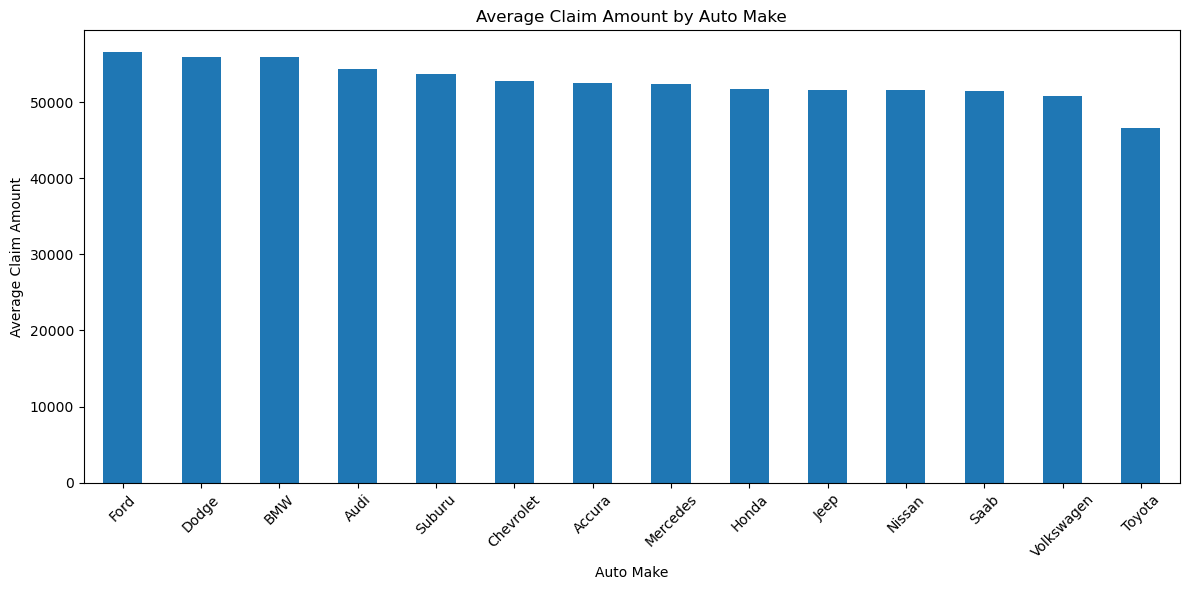

In [41]:
# Analyze average claim amount by auto make
plt.figure(figsize=(12, 6))
data.groupby('auto_make')['total_claim_amount'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Claim Amount by Auto Make')
plt.xlabel('Auto Make')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

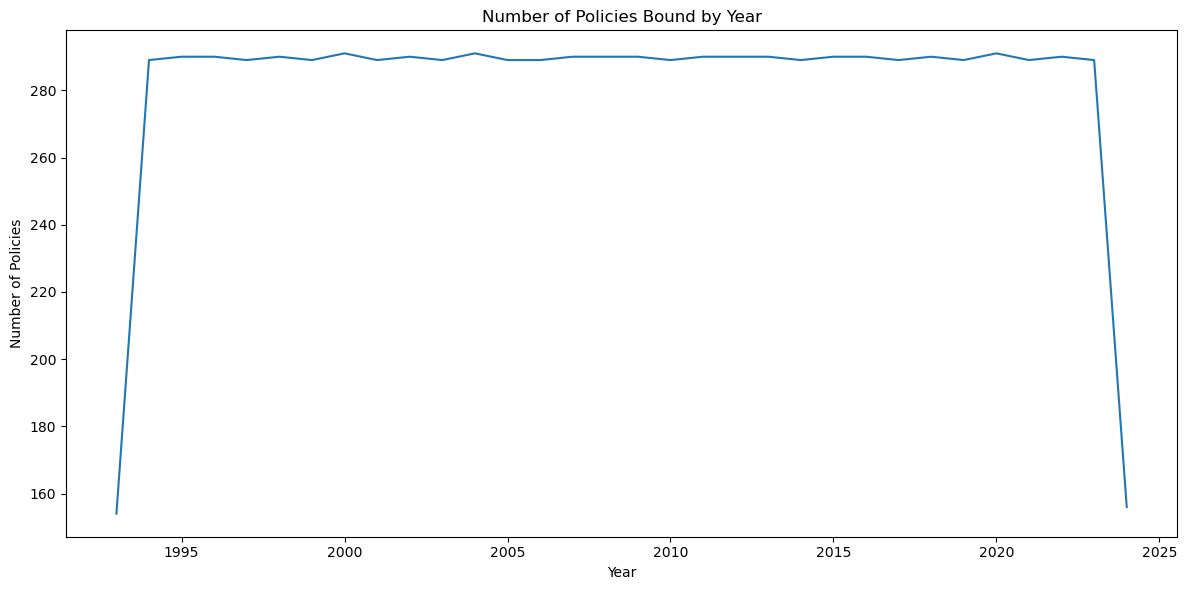

In [43]:
# Time series analysis of policy bind dates
data['policy_bind_year'] = data['policy_bind_date'].dt.year
plt.figure(figsize=(12, 6))
data['policy_bind_year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Policies Bound by Year')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.tight_layout()
plt.show()

/var/folders/vz/4w4ss9z17jj01jv7hv7f_qbw0000gn/T/ipykernel_55754/3095072203.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_reported.index, y=fraud_reported.values, palette='coolwarm')


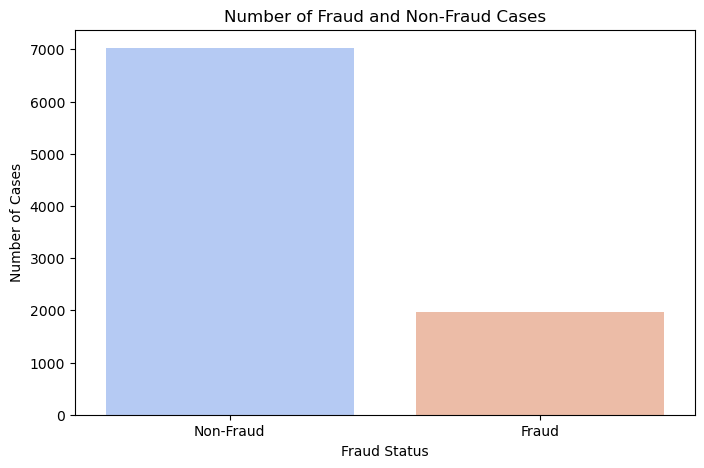

In [45]:
# Count the number of fraud and non-fraud cases
fraud_reported = data['fraud_reported'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_reported.index, y=fraud_reported.values, palette='coolwarm')
plt.title("Number of Fraud and Non-Fraud Cases")
plt.xlabel("Fraud Status")
plt.ylabel("Number of Cases")
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])
plt.show()

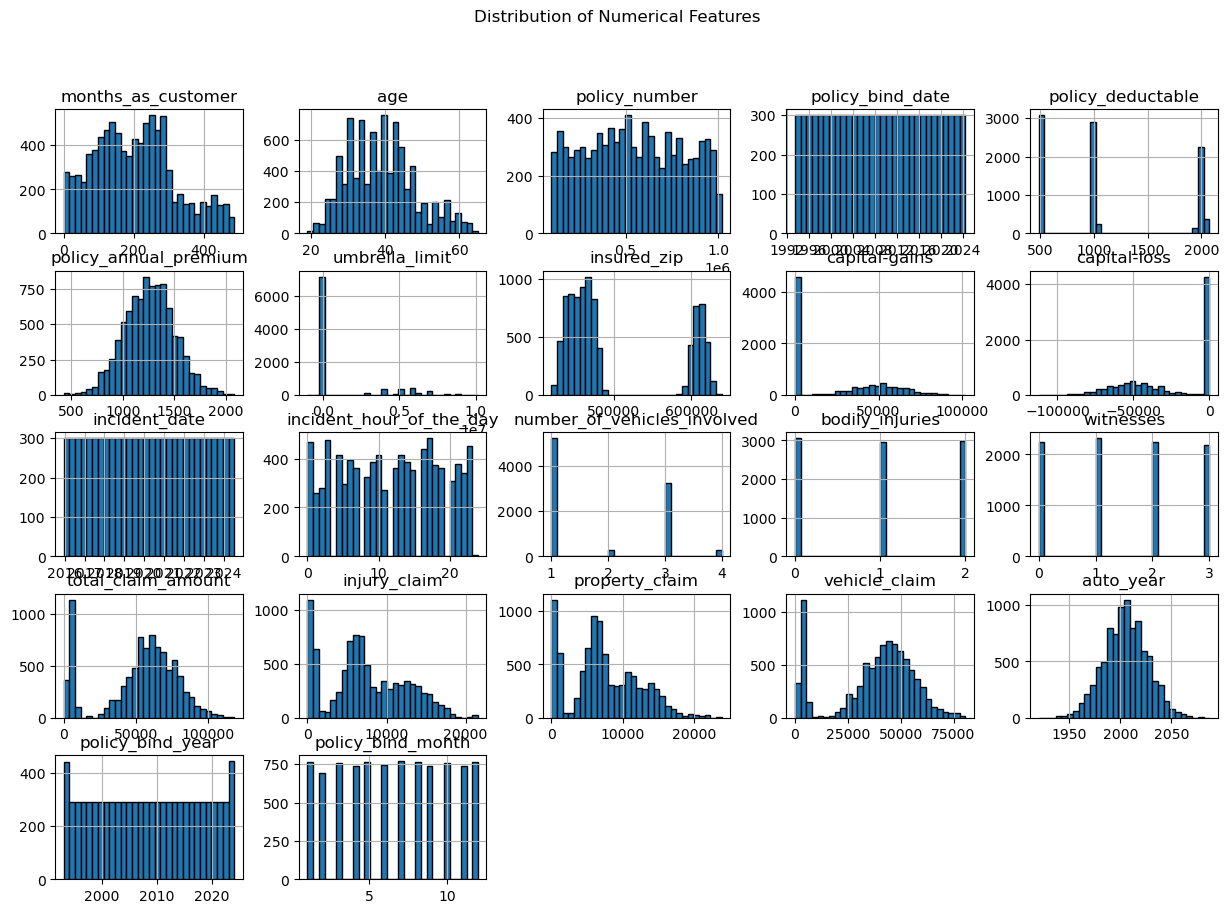

In [47]:
# Plot histograms for all numerical features
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

In [48]:
# Split features and target
X = data.drop(['fraud_reported', 'policy_number', 'policy_bind_date'], axis=1)
y = data['fraud_reported']

In [51]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
#Check for NaN values in your target variable
print(y_train.isna().sum())

0


In [55]:
imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [57]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [59]:
# Impute missing values
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

X_train_num = numeric_imputer.fit_transform(X_train[numeric_features])
X_test_num = numeric_imputer.transform(X_test[numeric_features])

X_train_cat = categorical_imputer.fit_transform(X_train[categorical_features])
X_test_cat = categorical_imputer.transform(X_test[categorical_features])

In [61]:
# Scale numeric features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [63]:
# Convert all categorical columns to string type
X_train_cat = X_train[categorical_features].astype(str)
X_test_cat = X_test[categorical_features].astype(str)

In [65]:
# Now proceed with encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [67]:
# Combine numeric and categorical features
X_train_preprocessed = np.hstack((X_train_num_scaled, X_train_cat_encoded))
X_test_preprocessed = np.hstack((X_test_num_scaled, X_test_cat_encoded))

In [69]:
# Create and train the logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_preprocessed, y_train_imputed)

LogisticRegression(random_state=42)

In [70]:
# Make predictions
y_pred = lr_model.predict(X_test_preprocessed)

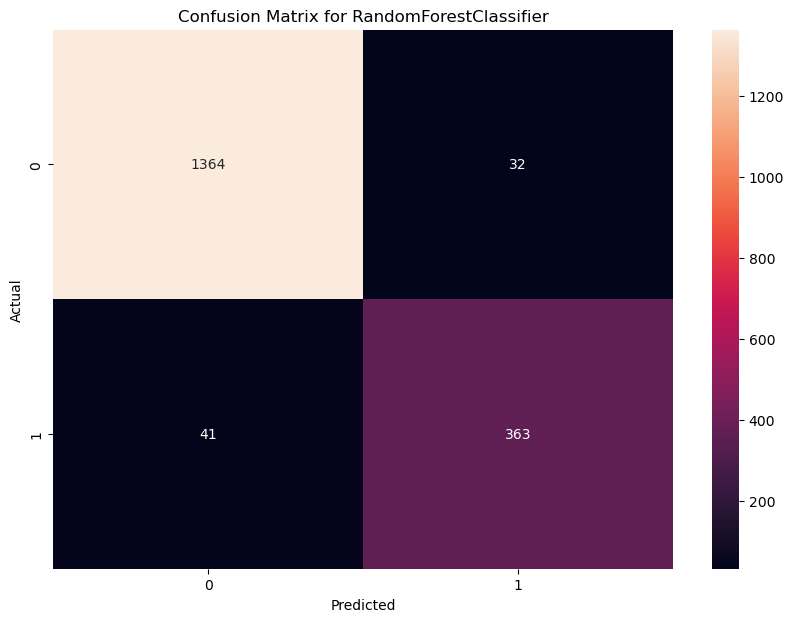

In [75]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [139]:
# testing on how good our machine is at guessing
y_pred_proba = lr_model.predict_proba(X_test_preprocessed)[:, 1]

In [141]:
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

In [143]:
# Now create the ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

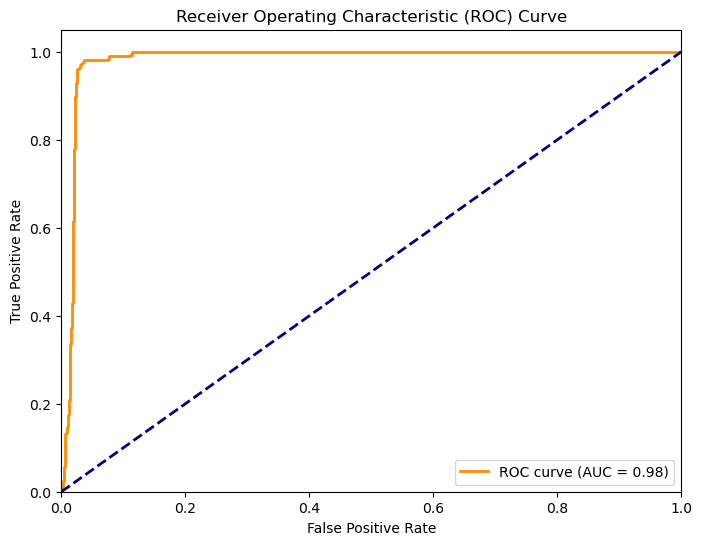

In [145]:
#Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [77]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.4f}")

print(classification_report(y_test, y_pred))

Accuracy: 95.9444
              precision    recall  f1-score   support

           N       0.97      0.98      0.97      1396
           Y       0.92      0.90      0.91       404

    accuracy                           0.96      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.96      0.96      0.96      1800



In [79]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train_imputed)  

RandomForestClassifier(random_state=42)

In [80]:
# Make predictions
y_pred = rf_model.predict(X_test_preprocessed)

In [83]:
# Print classification report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for RandomForestClassifier: {accuracy*100:.4f}")

print(classification_report(y_test, y_pred))

Accuracy for RandomForestClassifier: 98.2222
              precision    recall  f1-score   support

           N       1.00      0.98      0.99      1396
           Y       0.93      1.00      0.96       404

    accuracy                           0.98      1800
   macro avg       0.96      0.99      0.98      1800
weighted avg       0.98      0.98      0.98      1800



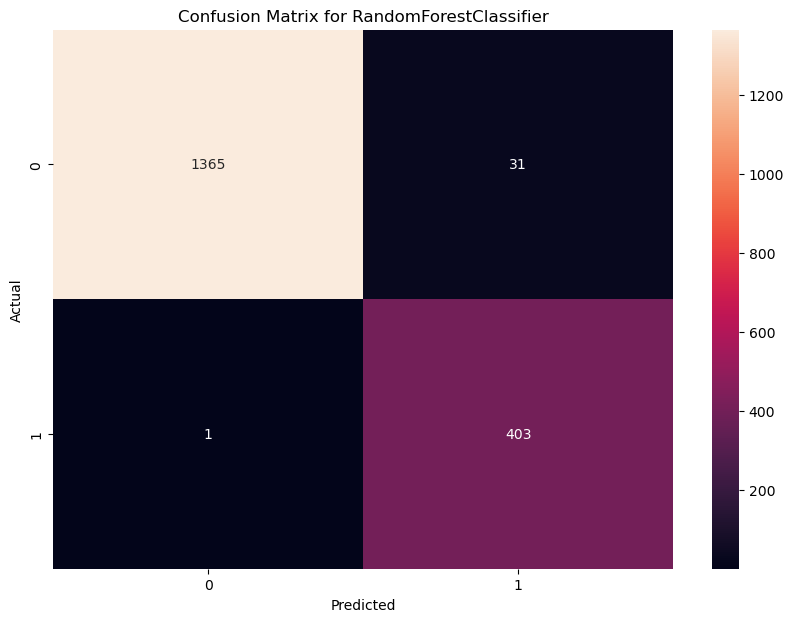

In [85]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [87]:
# testing on how good our machine is at guessing
y_pred_proba = rf_model.predict_proba(X_test_preprocessed)[:, 1]

In [91]:
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

In [93]:
# Now create the ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

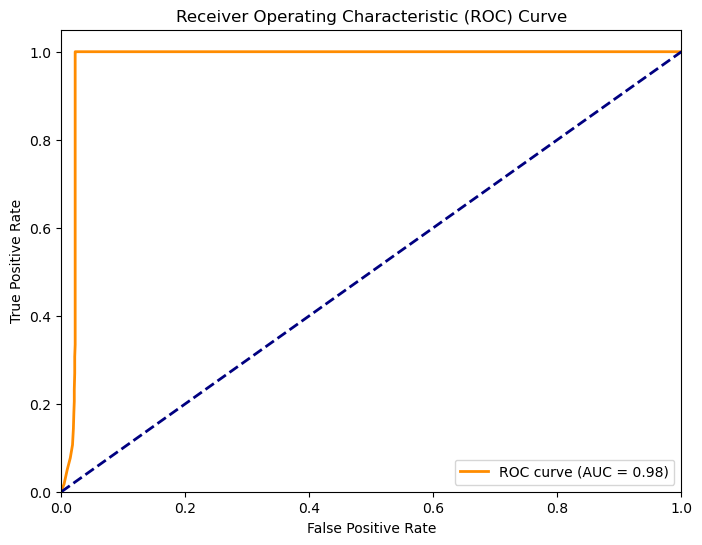

In [95]:
#Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [97]:
# Check if one-hot encoding or other transformations were applied
# For example, using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)

# Get feature names after transformation
encoded_features = encoder.get_feature_names_out(X_train.columns)
X_train_encoded = encoder.fit_transform(X_train)  # assuming X_train is the original data

# Get feature names after transformation
encoded_features = encoder.get_feature_names_out(X_train.columns)

# Now, you can use these encoded feature names to match with importances
print(f"Number of encoded features: {len(encoded_features)}")

# Check if lengths match
if len(encoded_features) == len(importances):
    feature_importance_rf = pd.DataFrame({
        'Feature': encoded_features,
        'Importance': importances
    })

    # Sort by importance in descending order
    feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

    # Display the sorted feature importance
    print(feature_importance_rf)
else:
    print("The number of encoded features does not match the number of importances.")


Number of encoded features: 55891


NameError: name 'importances' is not defined

In [99]:
#encode the target variable using LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [101]:
#rain the model with the encoded targe
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_preprocessed, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [103]:
#When making predictions, use the encoded test set
y_pred_encoded = xgb_model.predict(X_test_preprocessed)

In [105]:
#to get the original labels, inverse transform the predictions
y_pred = le.inverse_transform(y_pred_encoded)

In [107]:
# Print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for XGBClassifier: {accuracy*100:.4f}")

print(classification_report(y_test, y_pred))

Accuracy for XGBClassifier: 97.5556
              precision    recall  f1-score   support

           N       0.99      0.98      0.98      1396
           Y       0.93      0.97      0.95       404

    accuracy                           0.98      1800
   macro avg       0.96      0.97      0.97      1800
weighted avg       0.98      0.98      0.98      1800



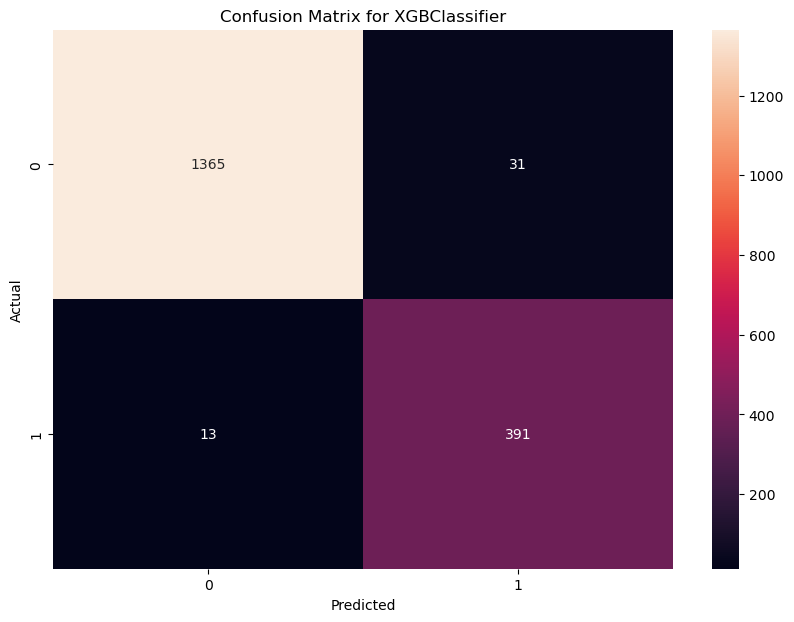

In [109]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for XGBClassifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [111]:
# testing on how good our machine is at guessing
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]

In [113]:
# Step 2: Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

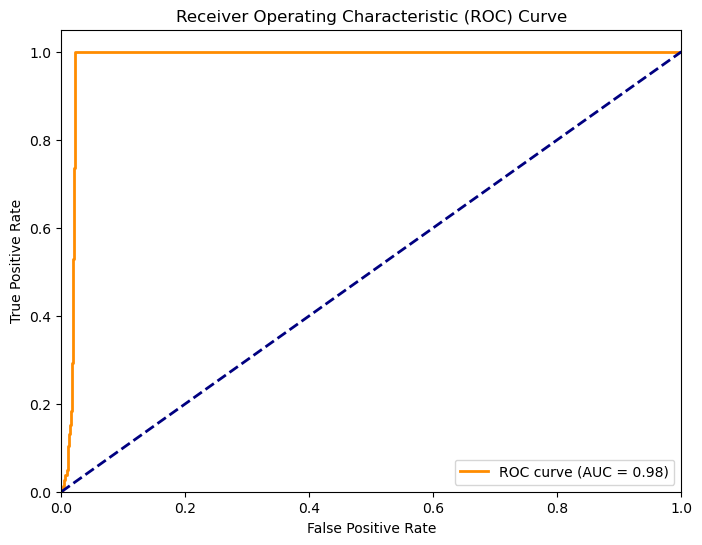

In [115]:
# Step 3: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [117]:
# Create and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_preprocessed, y_train_encoded)

SVC(random_state=42)

In [119]:
# Make predictions
y_pred = svm_model.predict(X_test_preprocessed)

In [121]:
#to get the original labels, inverse transform the predictions
y_pred = le.inverse_transform(y_pred_encoded)

In [123]:
# Print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for SVM: {accuracy*100:.4f}")
print(classification_report(y_test, y_pred))

Accuracy for SVM: 97.5556
              precision    recall  f1-score   support

           N       0.99      0.98      0.98      1396
           Y       0.93      0.97      0.95       404

    accuracy                           0.98      1800
   macro avg       0.96      0.97      0.97      1800
weighted avg       0.98      0.98      0.98      1800



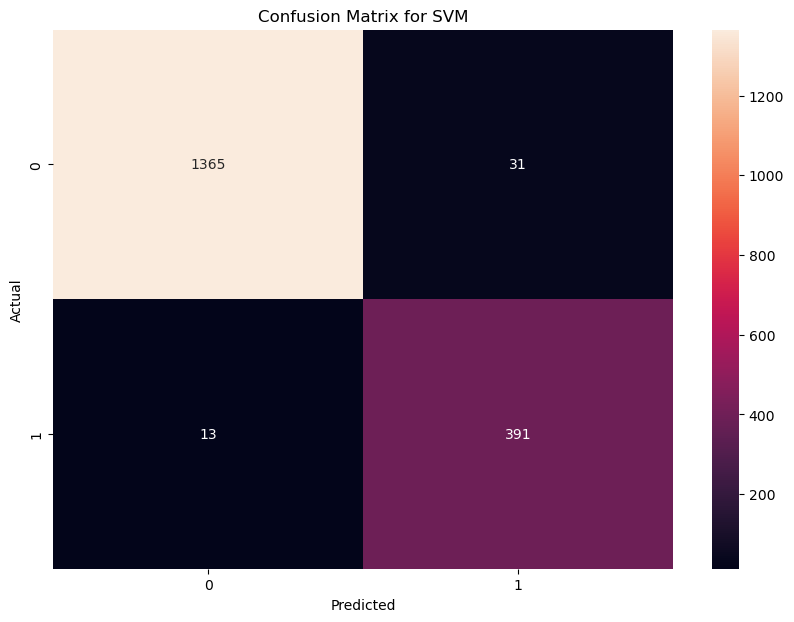

In [125]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()y_pred_proba = svm_model.predict_proba(X_test_preprocessed)[:, 1]


In [127]:
# Display the first few rows of the dataset
print("\nDataset Preview:")
print(data.head())


Dataset Preview:
   months_as_customer   age  policy_number        policy_bind_date  \
0               154.0  34.0       795697.0 2022-03-30 19:28:31.971   
1               172.0  36.0       792268.0 2001-04-27 22:40:12.961   
2               353.0  47.0       568504.0 2011-12-25 09:00:46.445   
3                47.0  37.0       971810.0 2021-12-17 10:10:11.341   
4               301.0  50.0       898345.0 2001-01-25 21:42:10.693   

  policy_state policy_csl  policy_deductable  policy_annual_premium  \
0           IL   500/1000              998.0             856.999452   
1           OH    250/500              987.0            1282.389619   
2           IN    250/500             1976.0            1145.490048   
3           IN    250/500             1999.0            1255.267879   
4           IL    100/300             1995.0            1376.096761   

   umbrella_limit  insured_zip  ... total_claim_amount injury_claim  \
0       3998347.0     419228.0  ...            67253.0      113